**1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.**

Anomaly Detection: Identifying data points or patterns that deviate from normal behavior.

Point Anomaly: A single data point that is unusually different (e.g., one ₹2 lakh transaction).

Contextual Anomaly: A data point that is anomalous only in a specific context (e.g., 30°C in winter).

Collective Anomaly: A group of points that together form an abnormal pattern (e.g., many failed logins indicating an attack).

**2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.**

Isolation Forest: Detects anomalies by quickly isolating them using random decision trees—best for high-dimensional large datasets.

DBSCAN: Detects anomalies as points in low-density regions—best for spatial or irregularly shaped data.

Local Outlier Factor (LOF): Detects anomalies by comparing a point’s local density to its neighbors—best when data has varying densities.

** 3: What are the key components of a Time Series? Explain each with one
example.**

Trend: Long-term upward or downward movement (e.g., sales steadily increasing every year).

Seasonality: Regular repeating patterns over fixed periods (e.g., ice-cream sales peak every summer).

Cyclical Component: Irregular long-term cycles tied to economic or business cycles (e.g., recession-caused drop in housing prices).

Residual/Noise: Random variations not explained by trend or seasonality (e.g., sudden one-day spike in website traffic).

**4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?**

Stationary Series: A time series whose mean, variance, and autocorrelation remain constant over time.

Test: Use ADF (Augmented Dickey–Fuller) or KPSS tests.

Transform: Apply differencing, log transform, or seasonal decomposition to make the series stationary.

**5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.**

AR uses past values, MA uses past errors, ARIMA combines both for non-seasonal data, SARIMA adds seasonal components, and SARIMAX further includes external variables for improved forecasting.

**10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage. Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)? ● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?**

To handle real-time 15-minute power-consumption streams, I would use anomaly detection models like Isolation Forest or Local Outlier Factor on rolling windows to instantly detect abnormal spikes or drops across regions, while SARIMAX would be used for short-term forecasting because it captures seasonality and incorporates external factors such as weather. Model performance would be validated using rolling cross-validation and monitored continuously with RMSE/MAE drift alerts and periodic retraining triggers. This end-to-end workflow enables the grid operator to proactively manage demand, prevent overloads, detect failures early, and optimize energy distribution and operational decisions.


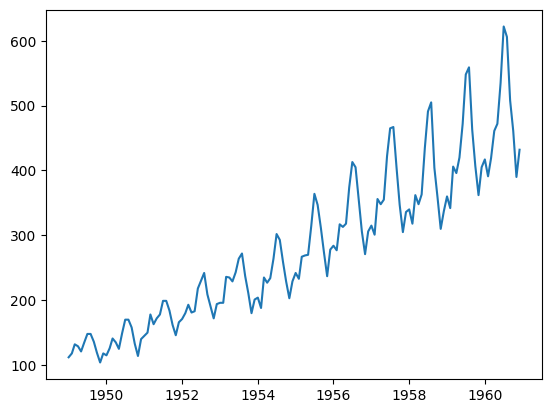

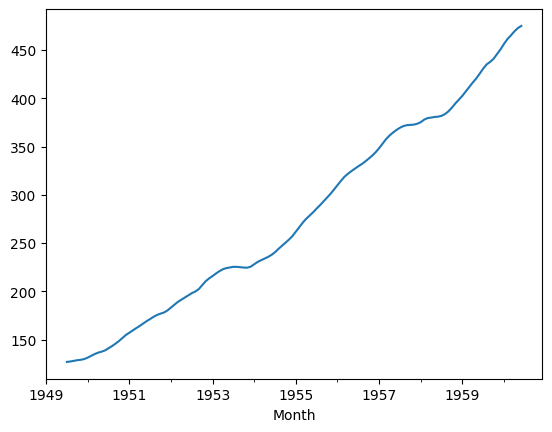

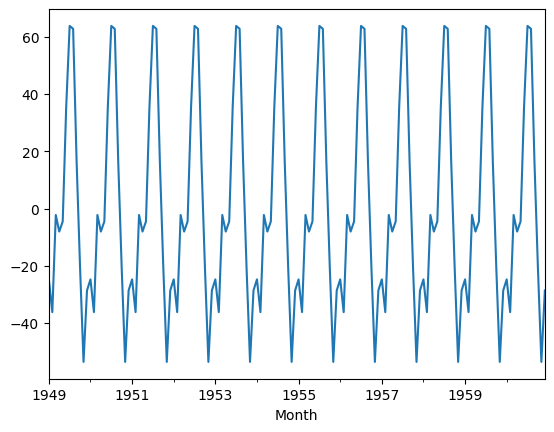

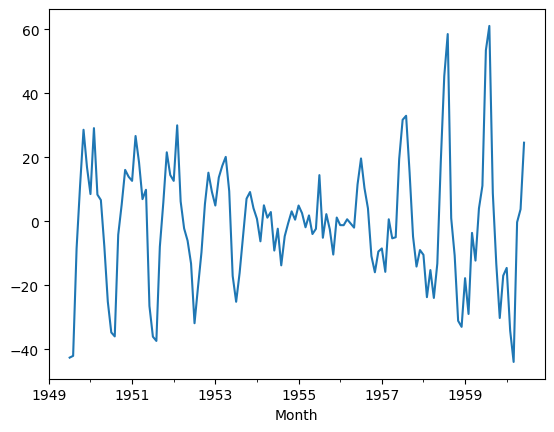

In [5]:
''' Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components'''
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('/content/sample_data/AirPassengers.csv')
df = df.dropna()
ts = pd.Series(df['#Passengers'].values, index=pd.to_datetime(df['Month']))

plt.plot(ts)
plt.show()

result = seasonal_decompose(ts, model='additive', period=12)
result.trend.plot()
plt.show()

result.seasonal.plot()
plt.show()

result.resid.plot()
plt.show()



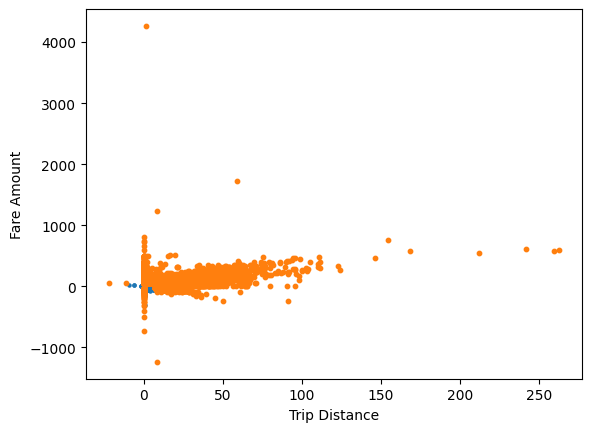

In [9]:
'''7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

df = pd.read_csv('/content/sample_data/NYC_taxi_fare_data.csv')
df = df[['fare_amount', 'trip_distance']].dropna()

model = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = model.fit_predict(df)

normal = df[df['anomaly'] == 1]
anomalies = df[df['anomaly'] == -1]

plt.scatter(normal['trip_distance'], normal['fare_amount'], s=5)
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'], s=10)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


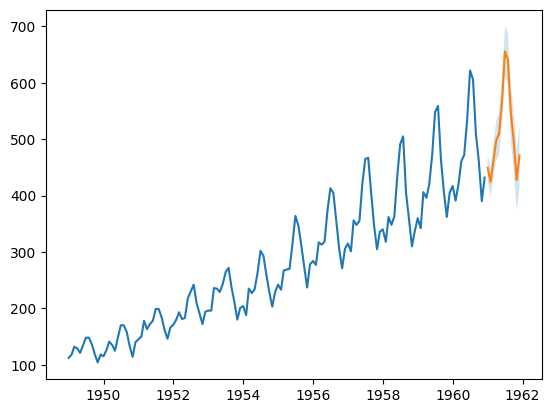

In [11]:
'''8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.'''

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('/content/sample_data/AirPassengers.csv')
df = df.dropna()
ts = pd.Series(df['#Passengers'].values, index=pd.to_datetime(df['Month']))

model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

forecast = result.get_forecast(steps=12)
pred = forecast.predicted_mean
ci = forecast.conf_int()

plt.plot(ts)
plt.plot(pred)
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.2)
plt.show()


In [ ]:
''' 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

df = pd.read_csv('/content/sample_data/NYC_taxi_fare_data.csv')
df = df[['fare_amount', 'trip_distance']].dropna()

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
df['anomaly'] = lof.fit_predict(df)

normal = df[df['anomaly'] == 1]
anomalies = df[df['anomaly'] == -1]

plt.scatter(normal['trip_distance'], normal['fare_amount'], s=5)
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'], s=10)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()


/tmp/ipython-input-3757485029.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/NYC_taxi_fare_data.csv')
